In [1]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [2]:
# Import training and test datasets generated from Tabular_Data.ipynb
training_df = pd.read_csv('training_data.csv')
test_df = pd.read_csv('test_data.csv')

In [3]:
# Create training and test, X and y variables
X_train = training_df.drop(columns='class_id')
X_test = test_df.drop(columns='class_id')

# Encoding class names to numerical values in order to be handled by XGBoost
y_train = training_df['class_id'].replace(['a', 'b', 'c'],[0, 1, 2])
y_test = test_df['class_id'].replace(['a', 'b', 'c'],[0, 1, 2])

In [4]:
# Fit model to taining data
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [5]:
# Make predictions using model
y_pred = model.predict(X_test)

In [6]:
# Reformatting y prediction and test variables to reflect actual class names
y_pred = pd.DataFrame(y_pred, columns=['class_id'])
y_pred['class_id'] = y_pred['class_id'].replace([0, 1, 2], ['a', 'b', 'c'])

y_test = pd.DataFrame(y_test, columns=['class_id'])
y_test['class_id'] = y_test['class_id'].replace([0, 1, 2], ['a', 'b', 'c'])

In [7]:
# Calculate accuracy of the predictions
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.9826666666666667


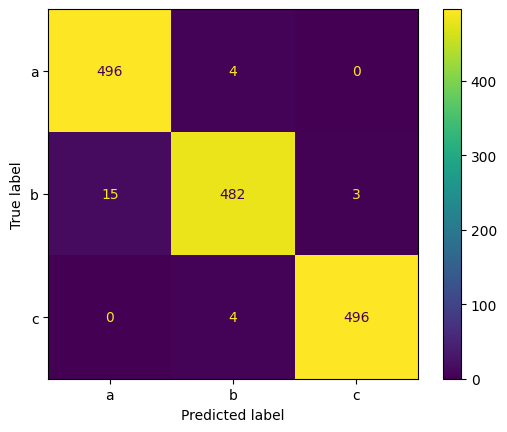

In [8]:
# Create confusion matrix to visualize prediction results
cm = confusion_matrix(y_test['class_id'], y_pred['class_id'], labels=['a', 'b', 'c'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['a', 'b', 'c'])
disp.plot()